In [1]:
!pip install numpy scikit-learn matplotlib tensorflow


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


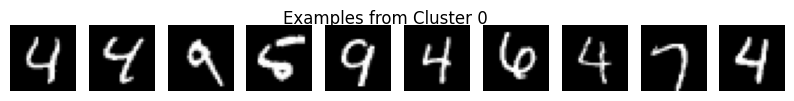

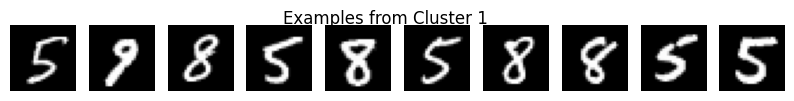

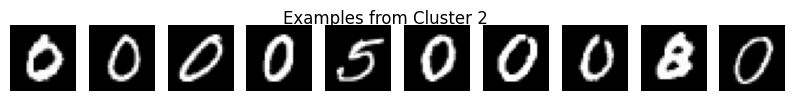

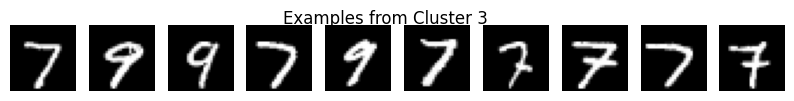

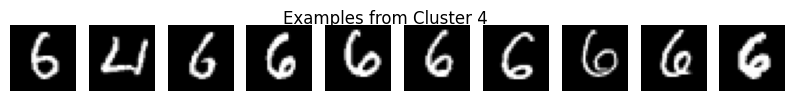

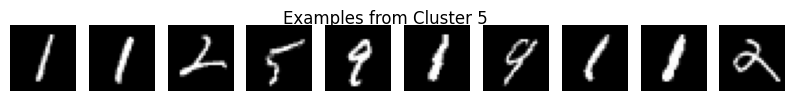

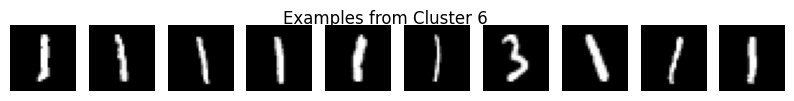

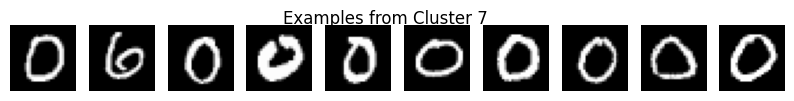

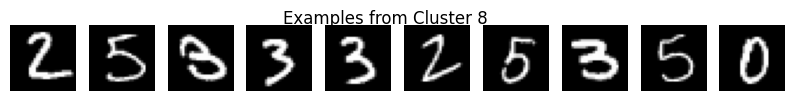

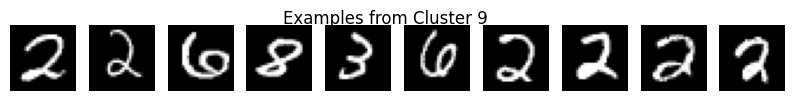

Clustering Accuracy: 0.59


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing
# Flatten the 28x28 images into vectors of size 784
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Normalize the pixel values to be between 0 and 1
X_train_flattened = X_train_flattened / 255.0
X_test_flattened = X_test_flattened / 255.0

# Reducing dimensionality for visualization and performance purposes (optional)
pca = PCA(n_components=50)  # Reduce to 50 components
X_train_pca = pca.fit_transform(X_train_flattened)

# KMeans Clustering
k = 10  # We know there are 10 digits (0-9) in the MNIST dataset
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_pca)

# Predicting the clusters for test set
y_kmeans = kmeans.predict(pca.transform(X_test_flattened))

# Visualizing some clusters
def plot_cluster_examples(cluster_num, kmeans_labels, original_images):
    # Find images belonging to the cluster
    cluster_indices = np.where(kmeans_labels == cluster_num)[0]
    num_examples = min(10, len(cluster_indices))  # Show up to 10 examples

    plt.figure(figsize=(10, 1))
    for i in range(num_examples):
        plt.subplot(1, 10, i + 1)
        plt.imshow(original_images[cluster_indices[i]], cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Examples from Cluster {cluster_num}")
    plt.show()

# Plot examples from each cluster
for cluster in range(k):
    plot_cluster_examples(cluster, y_kmeans, X_test)

# Evaluate the clustering by mapping clusters to actual labels
from scipy.stats import mode

cluster_labels = np.zeros_like(y_kmeans)
for i in range(k):
    mask = (y_kmeans == i)
    cluster_labels[mask] = mode(y_test[mask])[0]

accuracy = np.mean(cluster_labels == y_test)
print(f"Clustering Accuracy: {accuracy:.2f}")

